<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [3]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [6]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(len(Data_X))
print(len(Train_X))
print(len(Vald_X))
print(len(Test_X))
 
print(Data_X.shape)
print(Data_Y.shape)

22950
9180
6884
6886
(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 2491, 100)      2100      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 622, 100)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 603, 21)        42021     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 12, 21)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1260)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                80704 

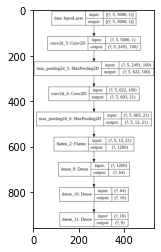

In [10]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 100, kernel_size = (1, 20),strides=(1, 2), activation = "relu") (inputs)
#x = layers.Conv2D(filters = 105, kernel_size = (1,50),padding = 'valid', activation='relu') (x)
#x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (x)
#block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
#x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
#block_2_output = layers.add([x, block_1_output])
 

#x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
#block_3_output = layers.add([x, block_2_output])


#x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)

#block_6_output = layers.add([x, block_3_output])
 
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
#block_7_output = layers.add([x, block_6_output])

#x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
x = layers.MaxPooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu")(x)
x = layers.MaxPooling2D(pool_size = (1,48))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [11]:
history = model.fit(Train_X, Train_Y, epochs=200,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/200
46/46 - 5s - loss: 0.9423 - accuracy: 0.5794 - val_loss: 0.5788 - val_accuracy: 0.6533
Epoch 2/200
46/46 - 5s - loss: 0.5026 - accuracy: 0.7179 - val_loss: 0.4823 - val_accuracy: 0.7212
Epoch 3/200
46/46 - 5s - loss: 0.4481 - accuracy: 0.7526 - val_loss: 0.4391 - val_accuracy: 0.7821
Epoch 4/200
46/46 - 5s - loss: 0.4085 - accuracy: 0.7836 - val_loss: 0.4352 - val_accuracy: 0.7410
Epoch 5/200
46/46 - 5s - loss: 0.3762 - accuracy: 0.7991 - val_loss: 0.3797 - val_accuracy: 0.8144
Epoch 6/200
46/46 - 5s - loss: 0.3491 - accuracy: 0.8119 - val_loss: 0.3375 - val_accuracy: 0.8206
Epoch 7/200
46/46 - 5s - loss: 0.3265 - accuracy: 0.8256 - val_loss: 0.3410 - val_accuracy: 0.8177
Epoch 8/200
46/46 - 5s - loss: 0.3015 - accuracy: 0.8413 - val_loss: 0.2796 - val_accuracy: 0.8402
Epoch 9/200
46/46 - 5s - loss: 0.2838 - accuracy: 0.8545 - val_loss: 0.2777 - val_accuracy: 0.8454
Epoch 10/200
46/46 - 5s - loss: 0.2730 - accuracy: 0.8637 - val_loss: 0.2498 - val_accuracy: 0.8706
Epoch 11/

In [12]:
#Test_X,Test_Y = prepare_test_data()
Test_Y_1 = Test_Y
Test_Y = to_categorical(Test_Y)
print(Test_X.shape)
print(Test_Y.shape)

(6886, 5, 5000, 1)
(6886, 9, 2)


In [13]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Testing ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
#print (model.predict(Test_X))
#print (Test_Y_1.astype('int'))
print ('true     ',Train_Y.astype('int'))    
print ('predicted', model.predict(Train_X))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.06199546903371811, 0.9677559733390808]
true      [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
predicted [[2.7319839e-08 3.7692797e-11 5.4481734e-19 ... 4.9267995e-10
  9.9968398e-01 6.0276424e-09]
 [4.0618481e-11 1.2596309e-24 2.1320583e-37 ... 8.6005343e-16
  9.9999988e-01 6.0009135e-08]
 [2.4897574e-08 9.4748028e-19 7.1346914e-16 ... 6.2955292e-15
  2.2214985e-10 2.9986067e-16]
 ...
 [3.2208249e-08 4.0971202e-07 5.3574067e-06 ... 9.9996567e-01
  3.0557942e-06 2.4889484e-06]
 [1.5775420e-10 3.2437002e-09 1.8156700e-07 ... 9.9999774e-01
  1.0501199e-07 1.5103776e-06]
 [3.7159473e-22 1.0921264e-12 3.0395992e-28 ... 1.2969227e-30
  4.3513481e-11 4.8954815e-25]]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
______

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


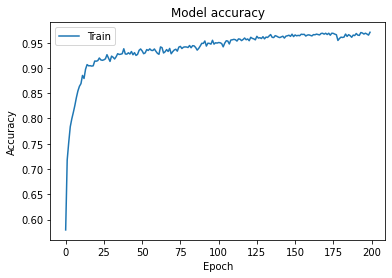

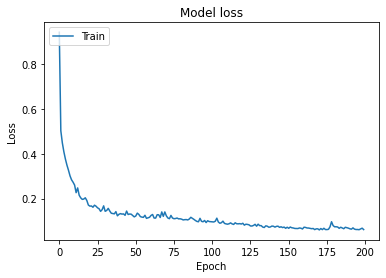

In [14]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]